In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# **Importing Datasets**

In [ ]:
data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

<ipython-input-3-4a66f74667dc>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


**Training Dataset**

In [ ]:
data.shape

(241338, 5)

In [ ]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
241333,25,32,2011-10-14,3298.56,FALSE
241334,25,32,2011-10-21,3297.56,FALSE
241335,25,32,2011-10-28,2965.97,FALSE
241336,25,32,2011-11-04,2524.38,FALSE
241337,25,32,2011-11-11,3377.43,FAL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241338 entries, 0 to 241337
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         241338 non-null  int64  
 1   Dept          241338 non-null  int64  
 2   Date          241338 non-null  object 
 3   Weekly_Sales  241338 non-null  float64
 4   IsHoliday     241338 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.2+ MB


**Dataset containing info of Stores**

In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [ ]:
features.shape

(8190, 12)

In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [ ]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [ ]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [ ]:
data = pd.merge(data,stores,on='Store',how='left')

In [ ]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.sort_values(by=['Date'],inplace=True)

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [ ]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241338 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         241338 non-null  int64         
 1   Dept          241338 non-null  int64         
 2   Date          241338 non-null  datetime64[ns]
 3   Weekly_Sales  241338 non-null  float64       
 4   Type          241338 non-null  object        
 5   Size          241338 non-null  int64         
 6   Temperature   241338 non-null  float64       
 7   Fuel_Price    241338 non-null  float64       
 8   MarkDown1     241338 non-null  float64       
 9   MarkDown2     241338 non-null  float64       
 10  MarkDown3     241338 non-null  float64       
 11  MarkDown4     241338 non-null  float64       
 12  MarkDown5     241338 non-null  float64       
 13  CPI           241338 non-null  float64       
 14  Unemployment  241338 non-null  float64       
 15  I

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,12,90,2010-02-05,9750.53,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False
2010-02-05,21,31,2010-02-05,3289.92,B,140167,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,6,96,2010-02-05,24989.15,A,202505,40.43,2.572,0.0,0.0,0.0,0.0,0.0,212.622352,7.259,False
2010-02-05,6,95,2010-02-05,90278.94,A,202505,40.43,2.572,0.0,0.0,0.0,0.0,0.0,212.622352,7.259,False


# **Splitting Date Column**

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-24-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,12,90,2010-02-05,9750.53,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False,2010,2,5
2010-02-05,21,31,2010-02-05,3289.92,B,140167,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2010,2,5
2010-02-05,6,96,2010-02-05,24989.15,A,202505,40.43,2.572,0.0,0.0,0.0,0.0,0.0,212.622352,7.259,False,2010,2,5
2010-02-05,6,95,2010-02-05,90278.94,A,202505,40.43,2.572,0.0,0.0,0.0,0.0,0.0,212.622352,7.259,False,2010,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [ ]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       21
dtype: int64

In [ ]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,22,87,2010-02-05,15031.98,B,119557,24.36,2.788,0.0,0.0,...,8.283,False,2010,2,5,23313.48,10385.59,14335.824825,14203.30,2063.088791
2010-02-05,4,85,2010-02-05,3181.36,A,205863,43.76,2.598,0.0,0.0,...,8.623,False,2010,2,5,5516.62,1392.31,2730.060000,2625.13,730.198118
2010-02-05,13,80,2010-02-05,18369.14,A,219622,31.53,2.666,0.0,0.0,...,8.316,False,2010,2,5,25142.22,15465.54,18874.443636,18662.15,1397.115643
2010-02-05,16,81,2010-02-05,2580.80,B,57197,19.79,2.580,0.0,0.0,...,7.039,False,2010,2,5,5691.68,1965.46,3822.620629,3888.70,695.740827


In [ ]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
data.shape

(241317, 20)

In [ ]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(217258, 20)

**Negative Weekly Sales**

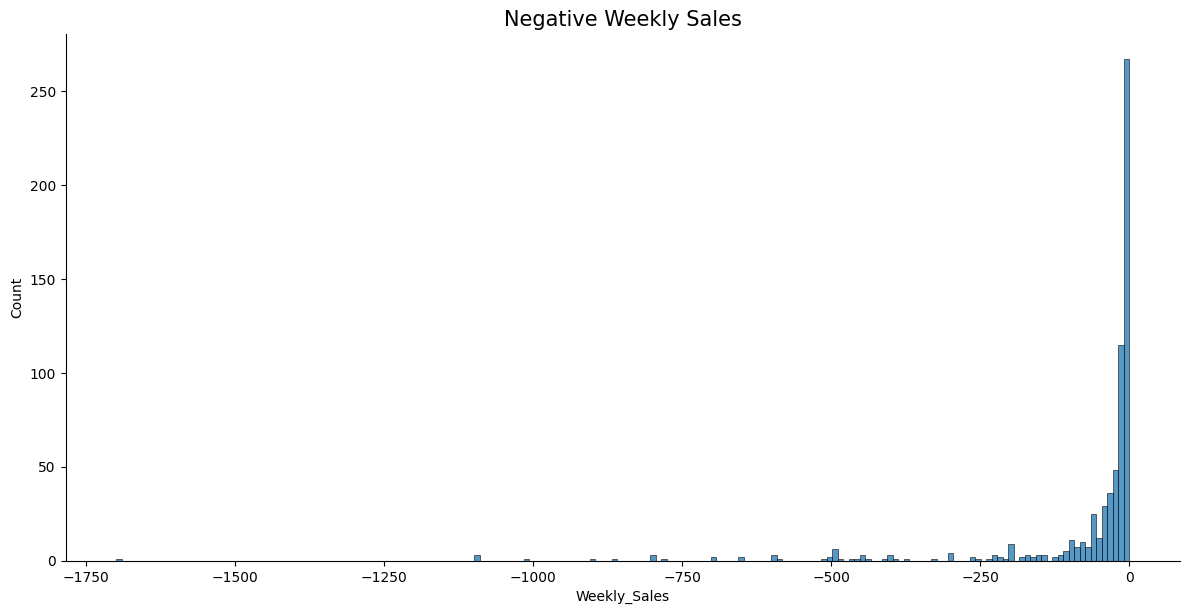

In [ ]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [ ]:
data=data[data['Weekly_Sales']>=0]

In [ ]:
data.shape

(216603, 20)

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,22,87,2010-02-05,15031.98,B,119557,24.36,2.788,135.352461,8.283,0,2010,2,5,23313.48,10385.59,14335.824825,14203.30,2063.088791,0.00
2010-02-05,4,85,2010-02-05,3181.36,A,205863,43.76,2.598,126.442065,8.623,0,2010,2,5,5516.62,1392.31,2730.060000,2625.13,730.198118,0.00
2010-02-05,13,80,2010-02-05,18369.14,A,219622,31.53,2.666,126.442065,8.316,0,2010,2,5,25142.22,15465.54,18874.443636,18662.15,1397.115643,0.00
2010-02-05,16,81,2010-02-05,2580.80,B,57197,19.79,2.580,189.381697,7.039,0,2010,2,5,5691.68,1965.46,3822.620629,3888.70,695.740827,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,40,2012-10-26,77927.39,A,219622,46.97,3.755,131.193097,5.621,0,2012,10,43,87474.15,69029.20,77752.306713,77712.67,4200.427798,17985.13
2012-10-26,6,25,2012-10-26,11177.16,A,202505,72.34,3.506,225.068625,5.329,0,2012,10,43,25226.00,7658.07,13777.691399,13145.05,3629.264986,9081.18
2012-10-26,17,2,2012-10-26,43451.19,B,93188,39.94,3.755,131.193097,5.527,0,2012,10,43,72470.80,24005.42,42231.844406,40864.52,6543.954483,6588.25


In [ ]:
data.to_csv('preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

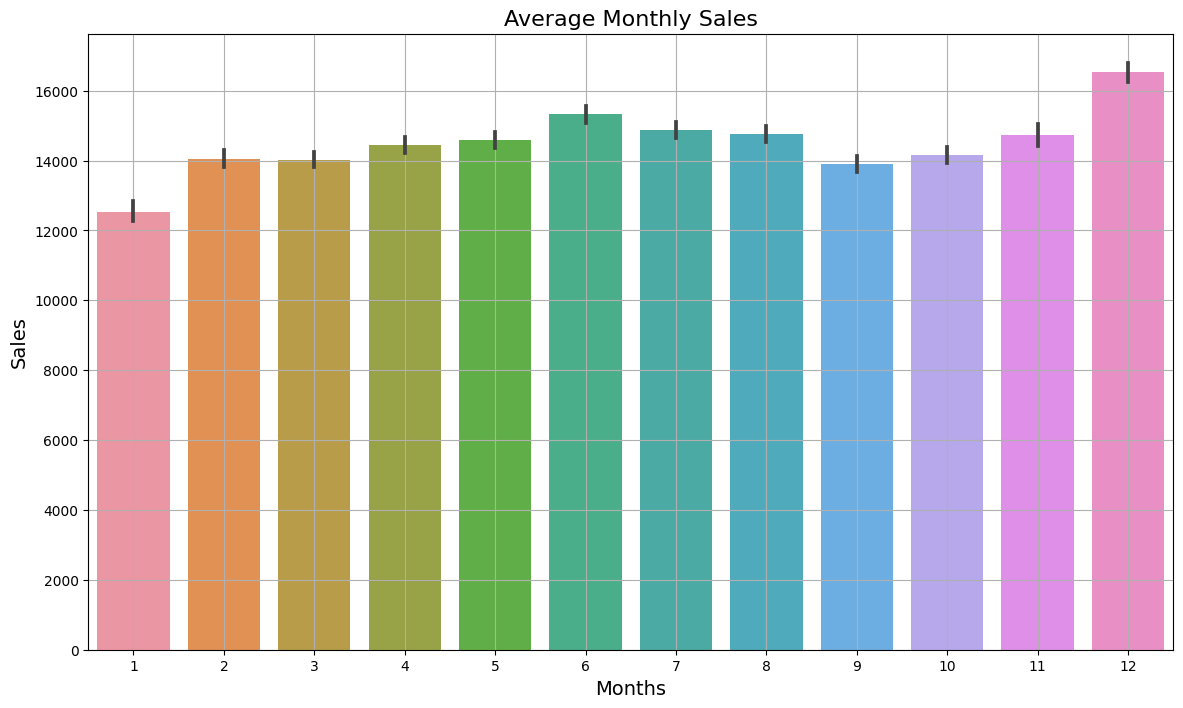

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

**Monthly Sales for Each Year**

In [ ]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,87888540.43,8.812591e+07,1.141996e+08,91241422.58,9.551409e+07,1.157318e+08,9.329451e+07,8.774463e+07,1.095118e+08,93704148.44,1.277431e+08
2011,74182100.46,86167127.56,8.665434e+07,1.123639e+08,89447132.42,9.496414e+07,1.150150e+08,9.159679e+07,1.079476e+08,9.012996e+07,68744334.47,1.025394e+08
2012,69540199.84,60090235.48,1.027753e+08,9.097812e+07,92470626.78,1.181491e+08,9.429341e+07,1.052024e+08,9.098909e+07,9.382868e+07,NaN,NaN


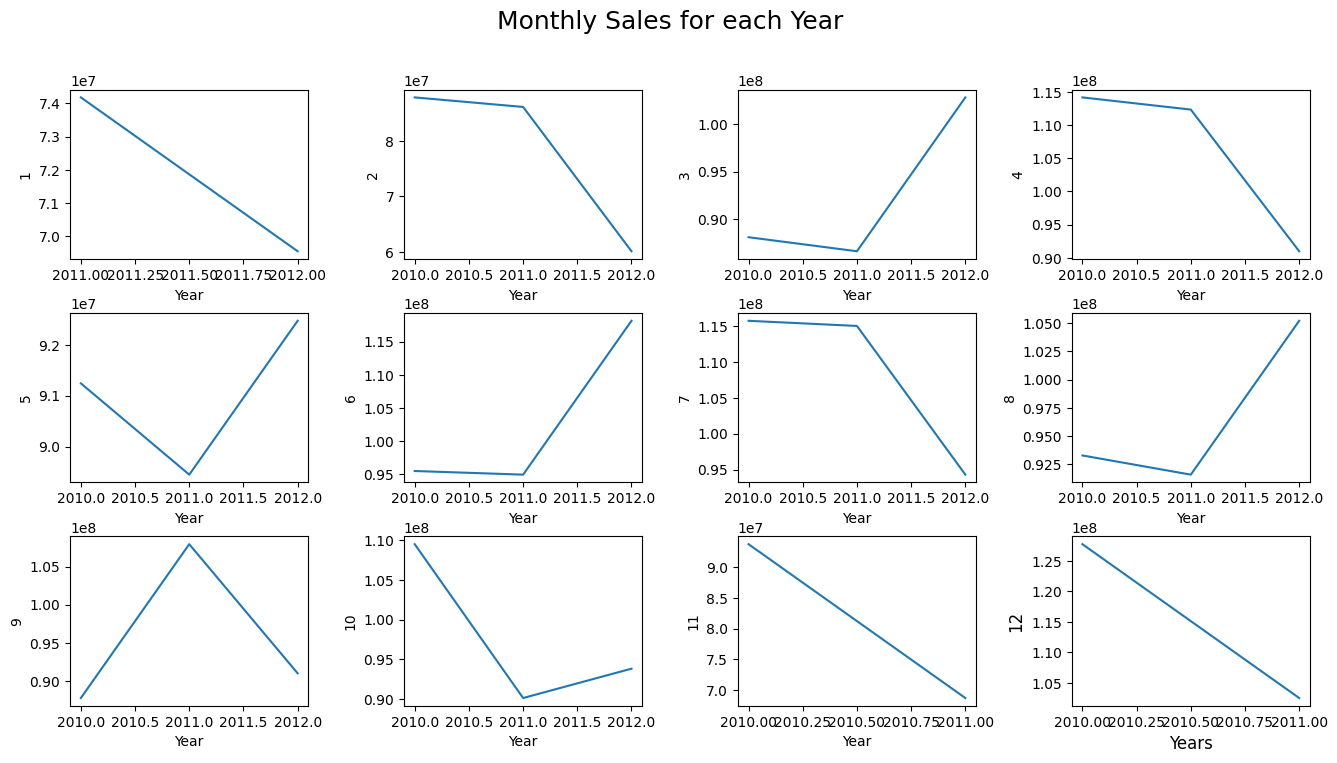

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1
plt.show()

**Average Weekly Sales Store wise**

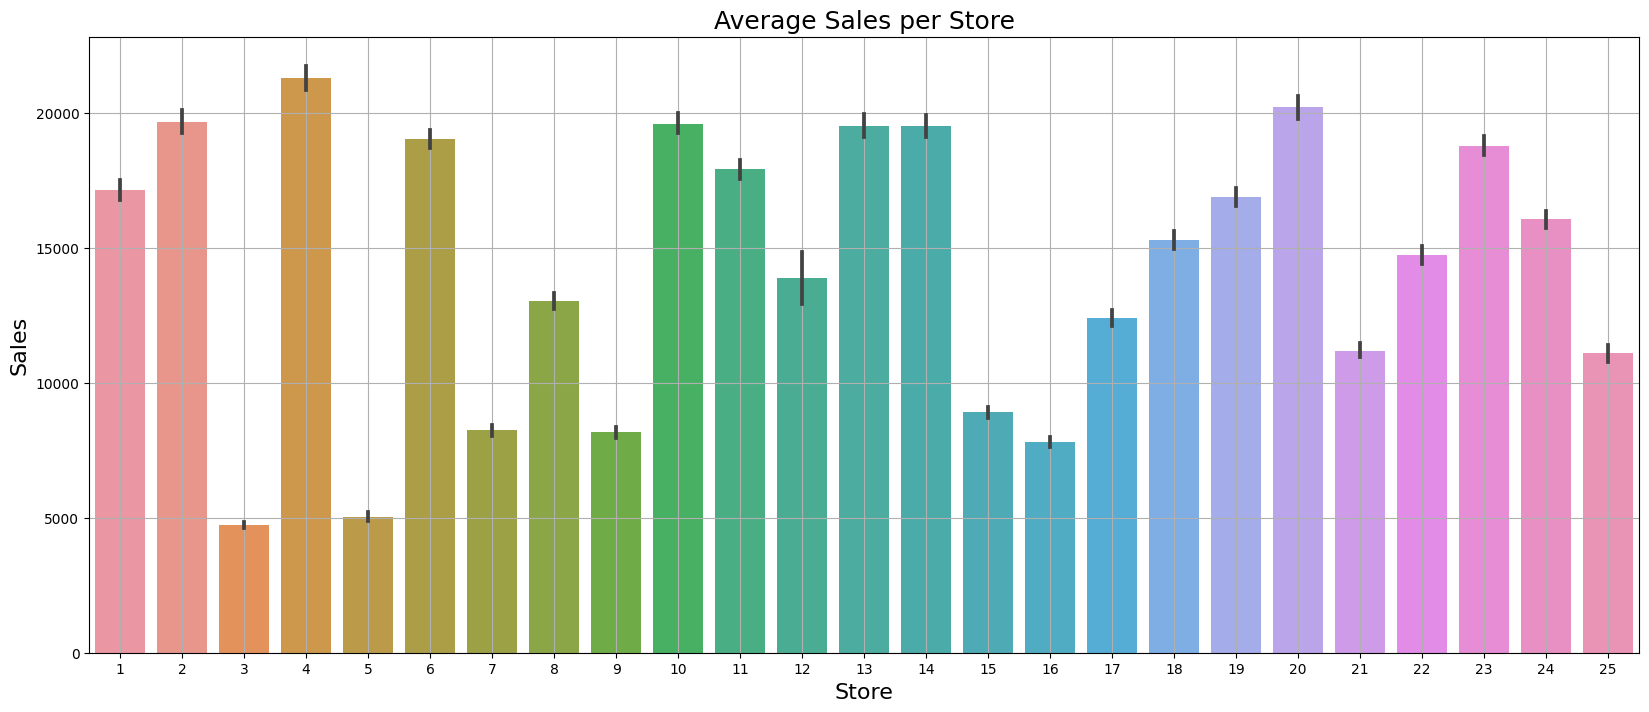

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)

plt.show()

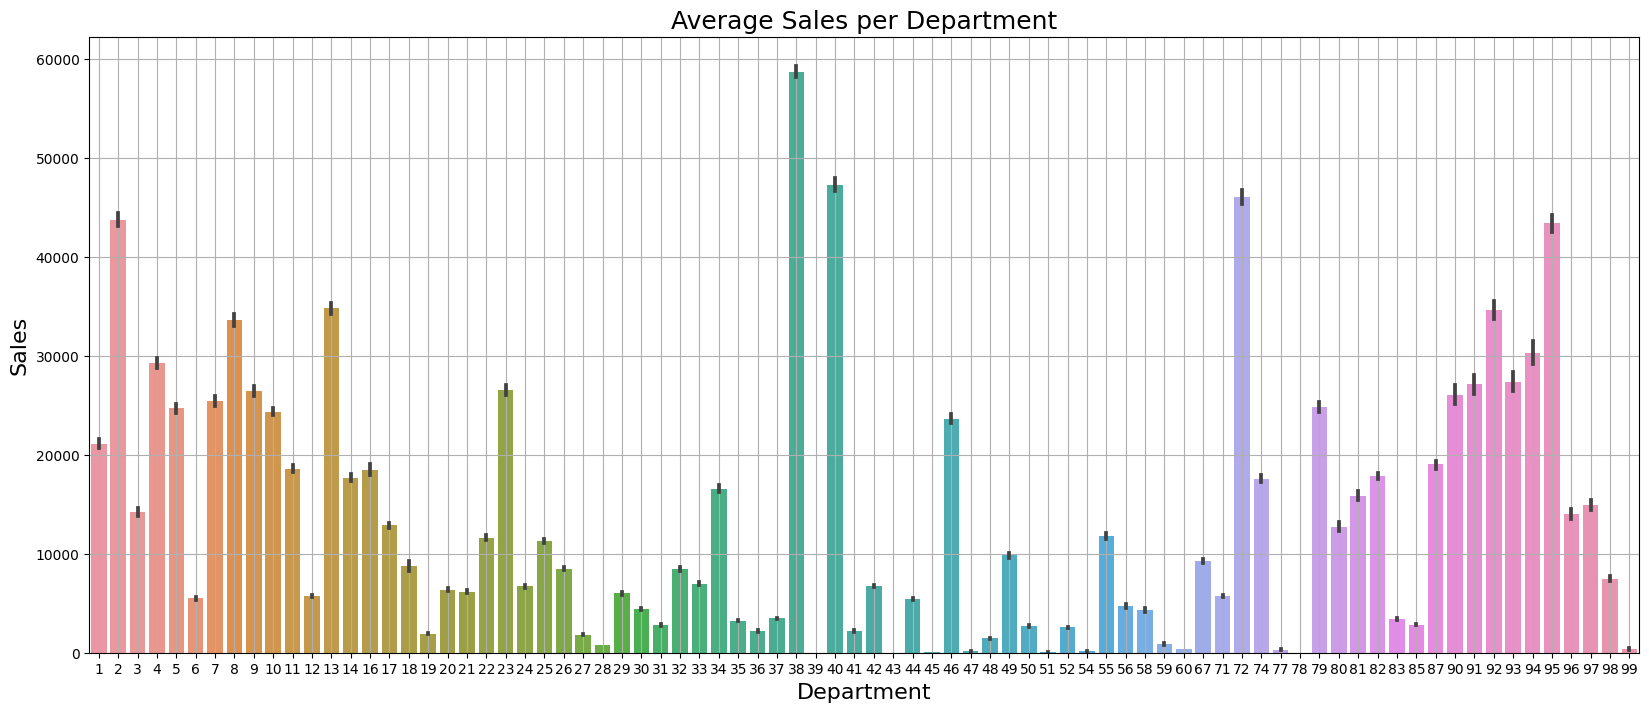

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)

plt.show()

**Sales Vs Temperature**

<ipython-input-44-971019de14fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


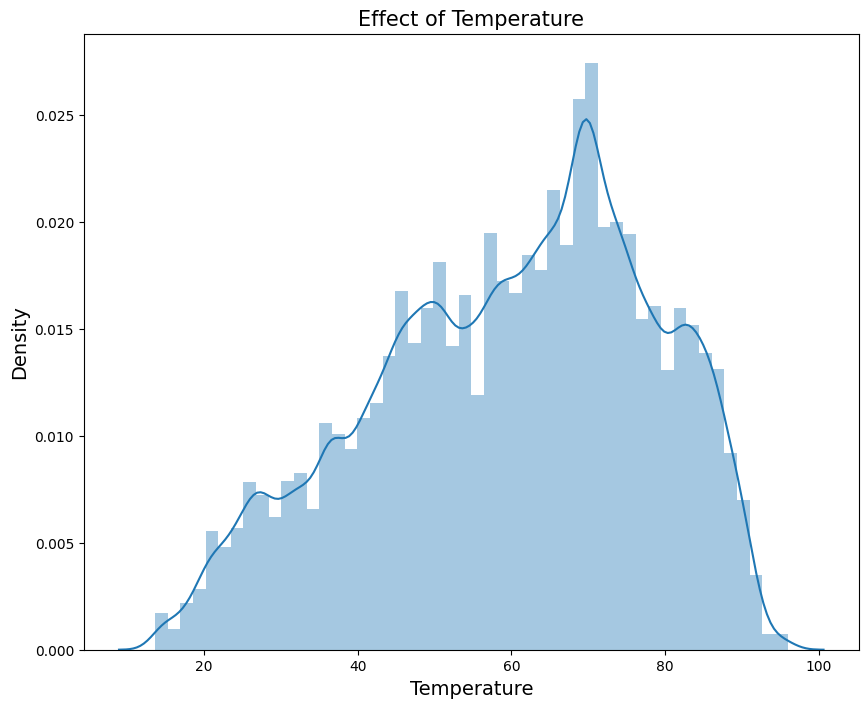

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.show()

**Holiday Distribution**

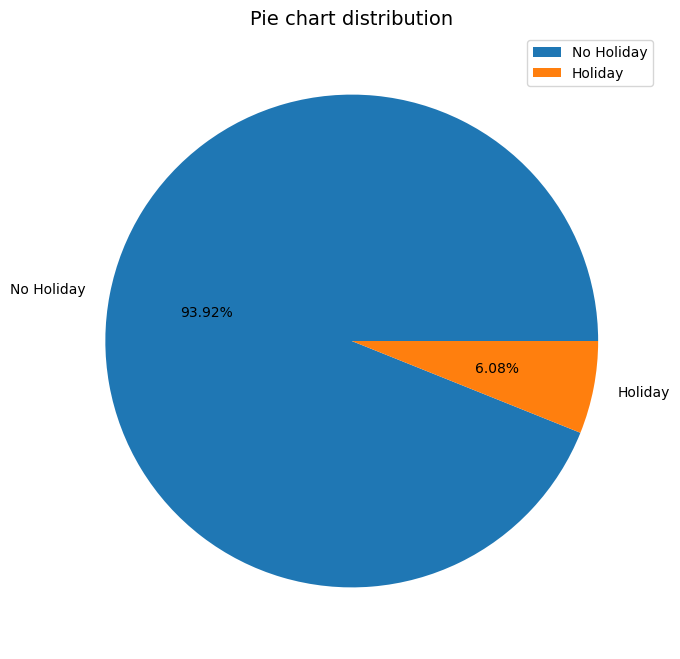

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

#**Time Series Decompose**

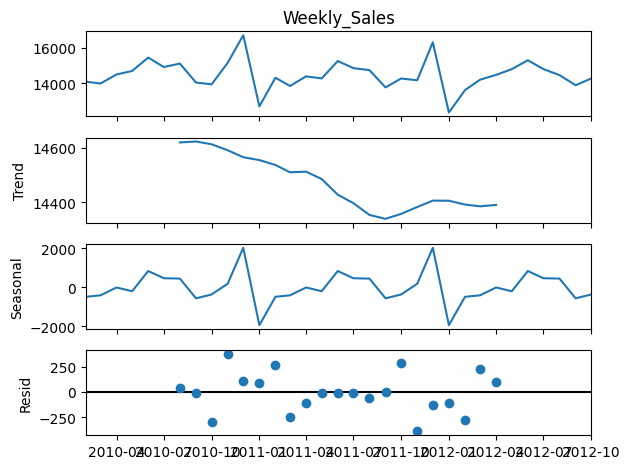

In [ ]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()

plt.show()

# **One-hot-encoding**

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,13,40,A
2012-10-26,6,25,A
2012-10-26,17,2,B
2012-10-26,9,59,B
2012-10-26,6,90,A


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(216603, 20)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(216603, 127)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.drop(columns=['Date'],inplace=True)

In [ ]:
data.shape

(216603, 123)

# **Data Normalization**

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,15031.98,119557,24.36,2.788,135.352461,8.283,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,3181.36,205863,43.76,2.598,126.442065,8.623,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,18369.14,219622,31.53,2.666,126.442065,8.316,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,2580.80,57197,19.79,2.580,189.381697,7.039,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.316254,0.630267,0.348487,0.029683,0.840500,0.599830,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.190733,0.458367,0.130303,0.140225,0.091812,0.624947,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,0.040367,0.925525,0.366112,0.042989,0.003737,0.673194,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.233076,1.000000,0.217455,0.077789,0.003737,0.629630,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.032746,0.120825,0.074754,0.033777,0.625862,0.448418,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1


# **Correlation between features of dataset**

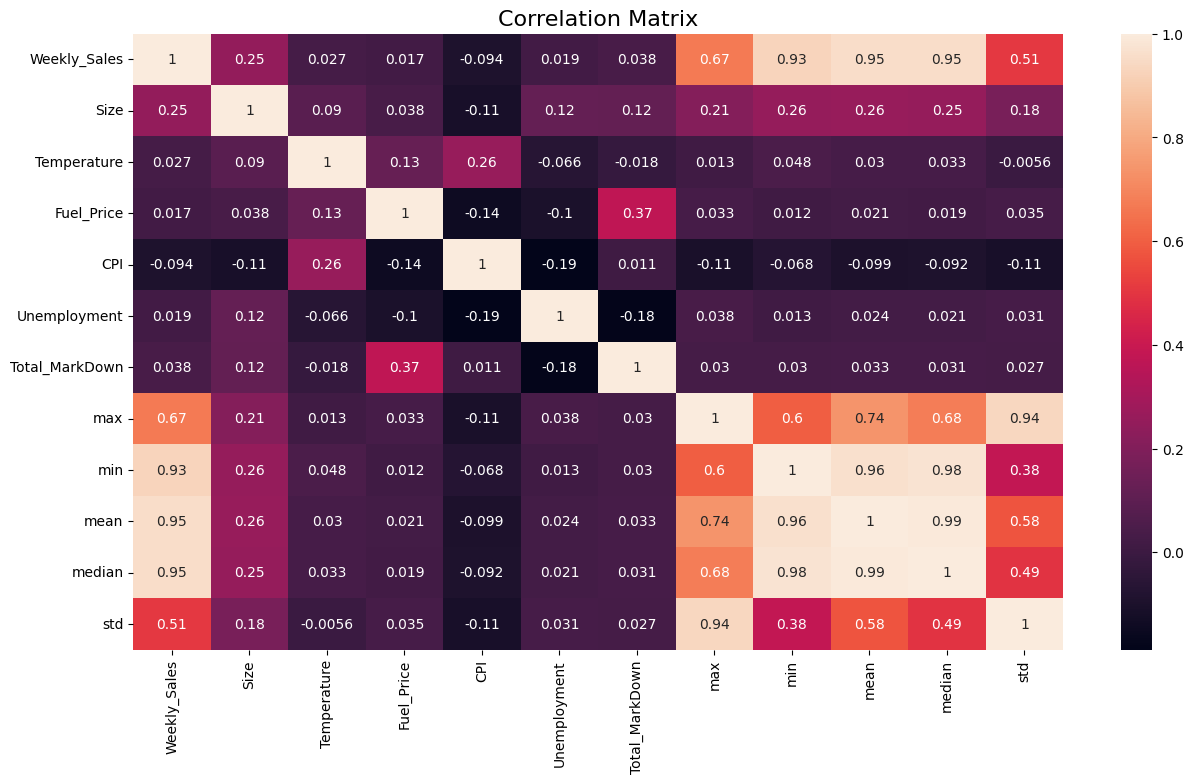

In [ ]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)

plt.show()

# **Recursive Feature Elimination**

In [ ]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_A', 'Type_B', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=122)

In [ ]:
'''
param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_train[feature_col],data_train['Weekly_Sales'])
'''

"\nparam_grid={'n_estimators':np.arange(10,25)}\ntree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)\ntree.fit(data_train[feature_col],data_train['Weekly_Sales'])\n"

In [ ]:
#tree.best_params_

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)


In [ ]:
data

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.316254,0.630267,0.348487,0.029683,0.840500,0.599830,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.190733,0.458367,0.130303,0.140225,0.091812,0.624947,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,0.040367,0.925525,0.366112,0.042989,0.003737,0.673194,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.233076,1.000000,0.217455,0.077789,0.003737,0.629630,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.032746,0.120825,0.074754,0.033777,0.625862,0.448418,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.988780,1.000000,0.405129,0.635107,0.050698,0.247197,0,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0.141821,0.907349,0.713504,0.507677,0.978608,0.205761,0,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0.551329,0.315637,0.319679,0.635107,0.050698,0.233858,0,2012,10,43,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.to_csv('final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  91.52297012888386


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03218626970399393
MSE 0.003815897383902121
RMSE 0.06177295026062881
R2 0.9152297406179852


In [ ]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2012-08-17,0.096848,0.099866
2011-09-16,0.616215,0.655167
2011-11-25,0.041004,0.043168
2012-04-06,0.137228,0.114094
2012-10-19,0.008250,0.003687
...,...,...
2011-04-08,0.949915,0.943661
2010-10-01,0.151988,0.134614
2010-03-19,0.025682,0.016648


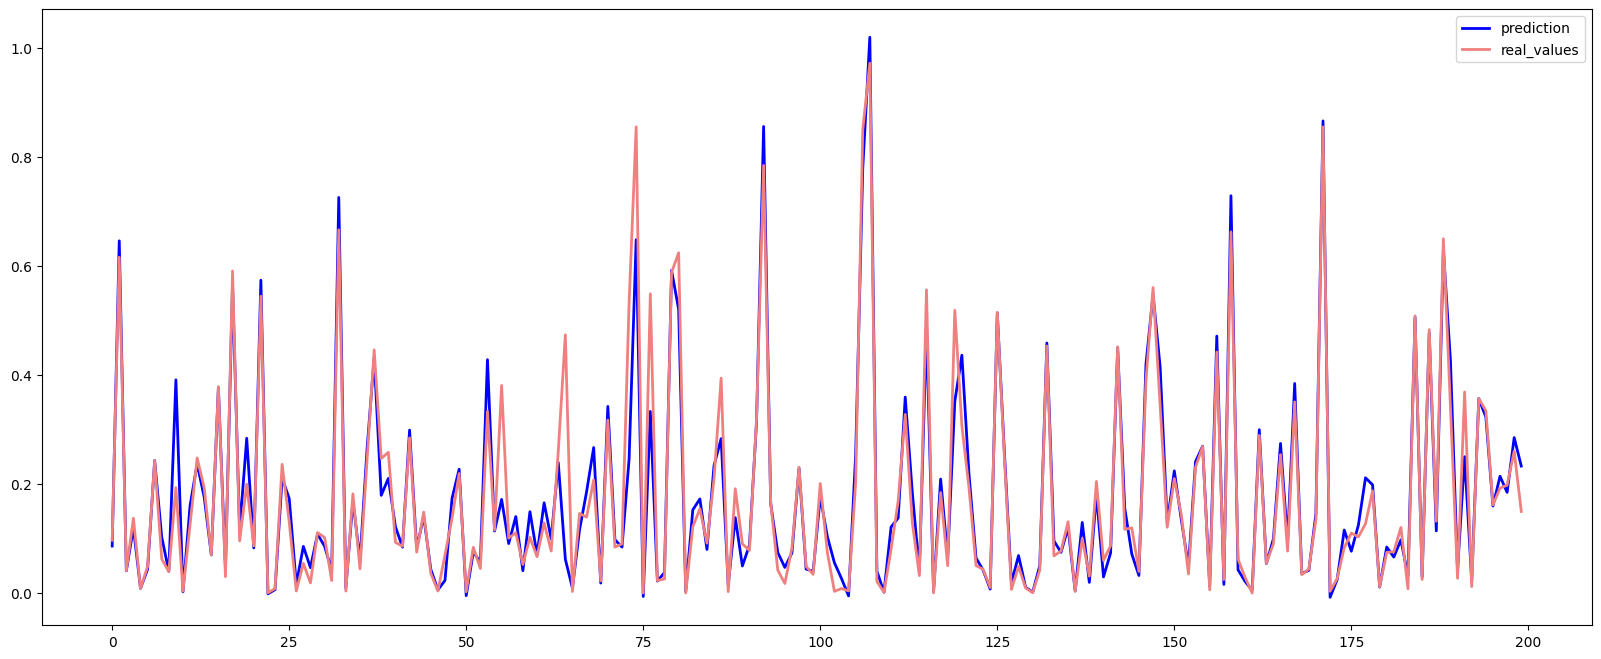

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('plots/lr_real_pred.png')
plt.show()

# **Random Forest Regressor Model**

In [ ]:
rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=2,min_samples_split=3, max_features=0.5 ,n_jobs=-1)
# rf.fit(X_train, y_train)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=2, min_samples_split=3,
                      n_jobs=-1)

In [ ]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.54844903507059


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.016598546872087633
MSE 0.0011035547893315492
RMSE 0.03321979514282936
R2 0.9754871330315386


In [ ]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2012-08-17,0.096848,0.099866
2011-09-16,0.616215,0.655167
2011-11-25,0.041004,0.043168
2012-04-06,0.137228,0.114094
2012-10-19,0.008250,0.003687
...,...,...
2011-04-08,0.949915,0.943661
2010-10-01,0.151988,0.134614
2010-03-19,0.025682,0.016648


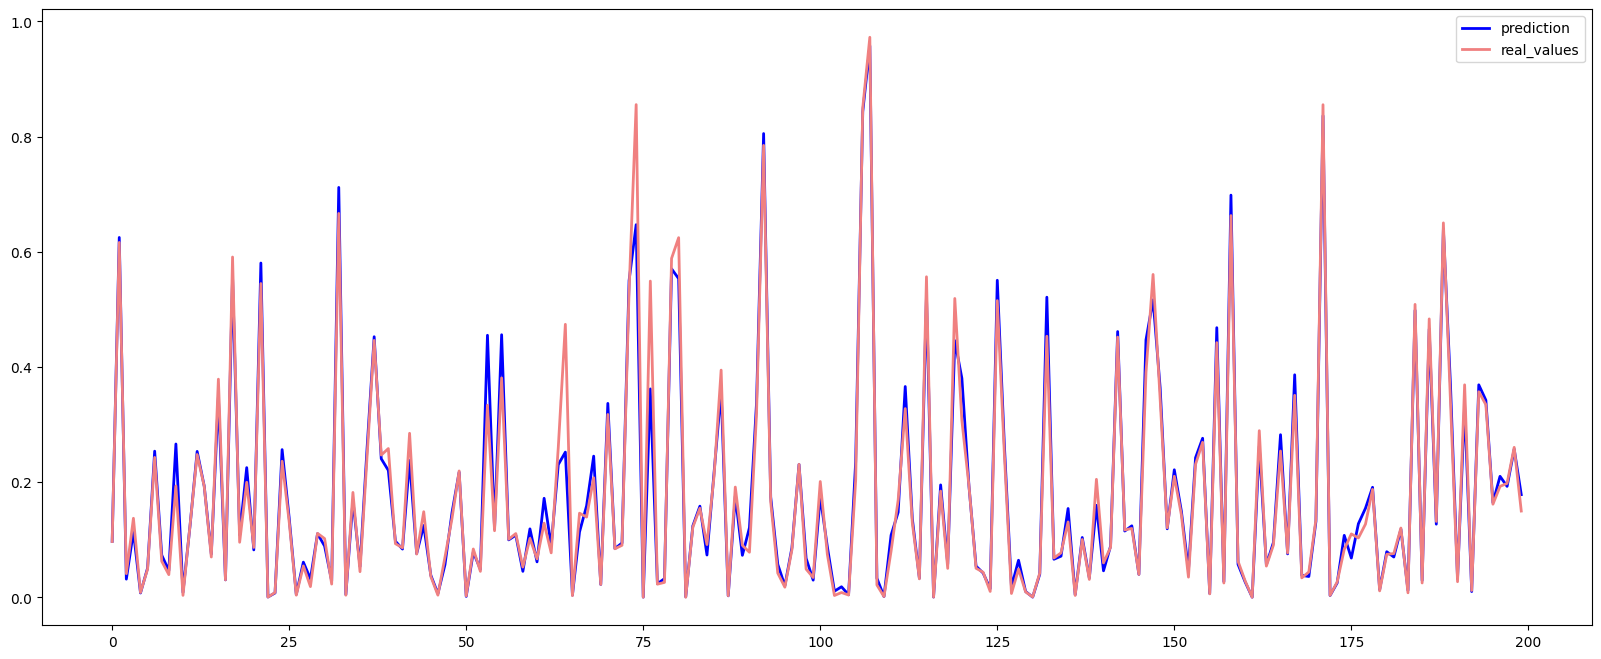

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('plots/rf_real_pred.png')
plt.show()

# **K Neighbors Regressor Model**

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  95.21934263840302


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.02216653887130051
MSE 0.0021519916995465754
RMSE 0.0463895645543971
R2 0.9522094416852463


In [ ]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2012-08-17,0.096848,0.099866
2011-09-16,0.616215,0.655167
2011-11-25,0.041004,0.043168
2012-04-06,0.137228,0.114094
2012-10-19,0.008250,0.003687
...,...,...
2011-04-08,0.949915,0.943661
2010-10-01,0.151988,0.134614
2010-03-19,0.025682,0.016648


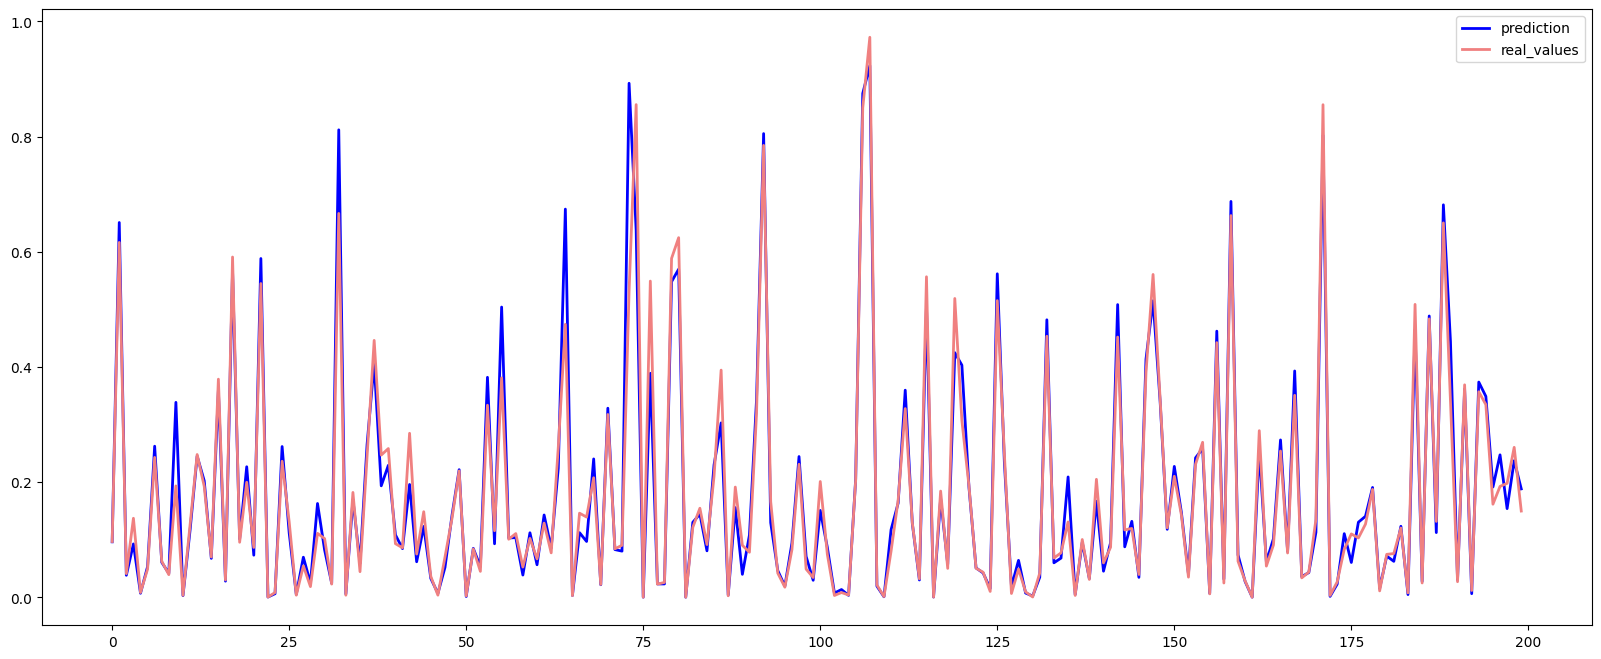

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('knn_real_pred.png')
plt.show()

# **XGboost Model**

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.40725565446903


In [ ]:
y_pred = xgbr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019325806281225714
MSE 0.0011671123631343267
RMSE 0.034163026258432184
R2 0.9740731945232541


In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2012-08-17,0.096848,0.099866
2011-09-16,0.616215,0.655167
2011-11-25,0.041004,0.043168
2012-04-06,0.137228,0.114094
2012-10-19,0.008250,0.003687
...,...,...
2011-04-08,0.949915,0.943661
2010-10-01,0.151988,0.134614
2010-03-19,0.025682,0.016648


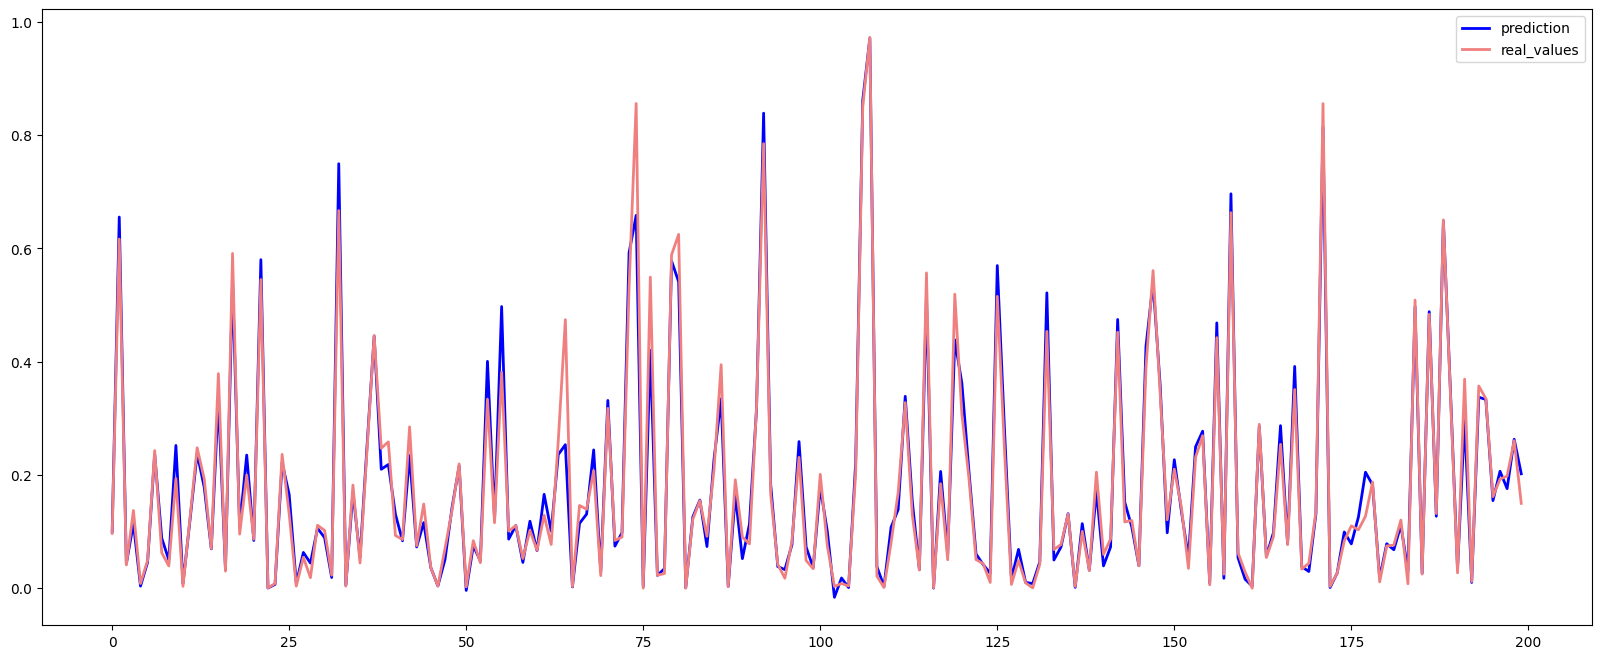

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('xgb_real_pred.png')
plt.show()

# **Comparing Models**

In [ ]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}

In [ ]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,91.522970
1,rf_acc,97.548449
2,knn_acc,95.219343
3,xgb_acc,97.407256


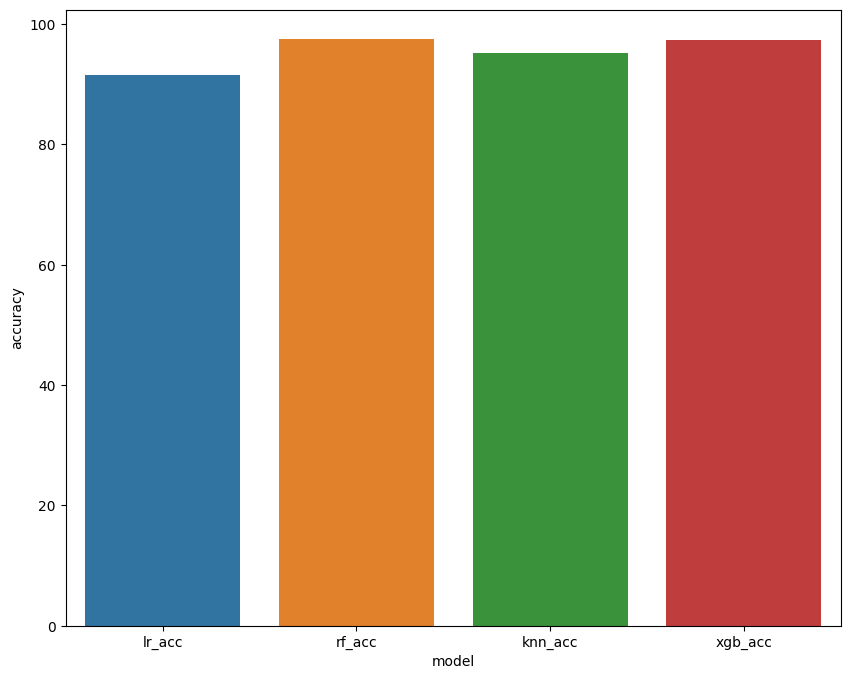

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('compared_models.png')
plt.show()

In [ ]:
#'Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std'

# pred=rf.predict()